In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [2]:
df.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [3]:
nulos = []

for i in df.columns:
    nivel = df.loc[((df[i]==None)), [i]].shape[0]
    if(nivel/df.shape[0]> 0):
        nulos.append(i)

In [4]:
nulos

[]

In [5]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [6]:
df = df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'classifier',
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' :'classifier2'
    
})

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'classifier', 'classifier2'],
      dtype='object')

<AxesSubplot:>

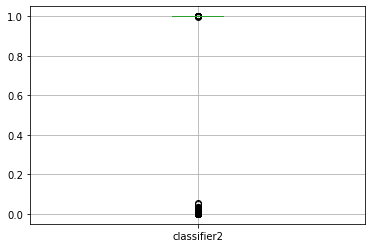

In [8]:
vector1 = df.loc[:, ['classifier2']]
vector1.boxplot()

<AxesSubplot:>

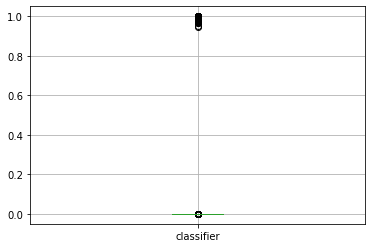

In [9]:
vector = df.loc[:,['classifier']]
vector.boxplot()

<AxesSubplot:>

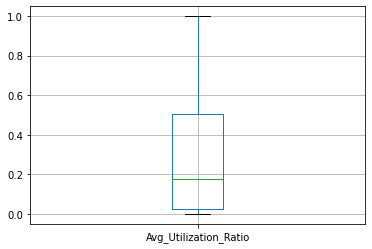

In [10]:
vector2 = df.loc[:,['Avg_Utilization_Ratio']]
vector2.boxplot()

<AxesSubplot:>

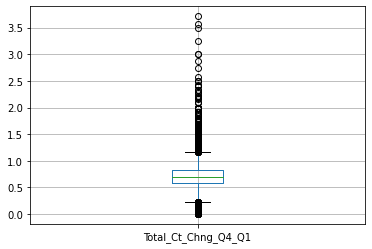

In [11]:
vector3 = df.loc[:,['Total_Ct_Chng_Q4_Q1']]
vector3.boxplot()

<AxesSubplot:>

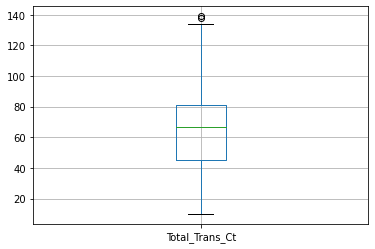

In [12]:
vector4 = df.loc[:,['Total_Trans_Ct']]
vector4.boxplot()

<AxesSubplot:>

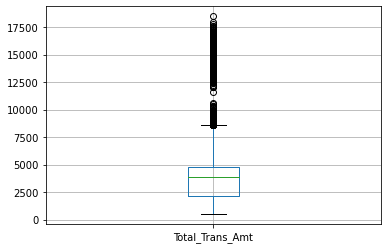

In [13]:
vector5 = df.loc[:,['Total_Trans_Amt']]
vector5.boxplot()

<AxesSubplot:>

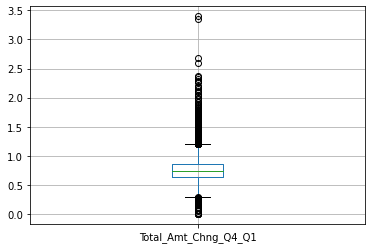

In [14]:
vector6 = df.loc[:,['Total_Amt_Chng_Q4_Q1']]
vector6.boxplot()

<AxesSubplot:>

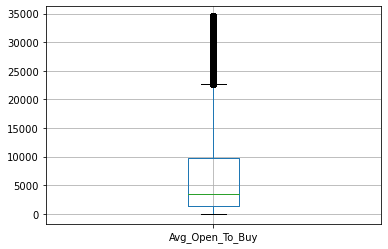

In [15]:
vector7 = df.loc[:,['Avg_Open_To_Buy']]
vector7.boxplot()

<AxesSubplot:>

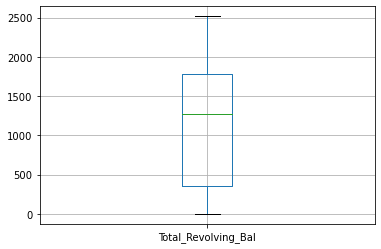

In [16]:

vector8 = df.loc[:,['Total_Revolving_Bal']]
vector8.boxplot()

<AxesSubplot:>

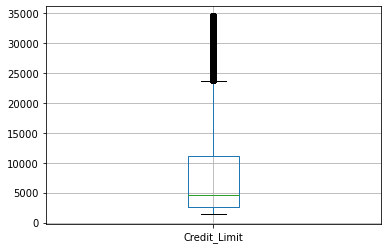

In [17]:
vector9 = df.loc[:,['Credit_Limit']]
vector9.boxplot()

<AxesSubplot:>

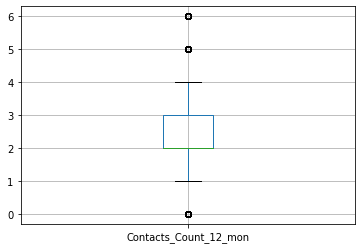

In [18]:
vector10 = df.loc[:,['Contacts_Count_12_mon']]
vector10.boxplot()

<AxesSubplot:>

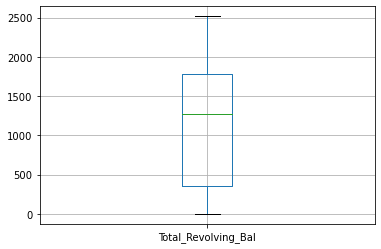

In [19]:
vector11 = df.loc[:,['Months_Inactive_12_mon']]
vector8.boxplot()

<AxesSubplot:>

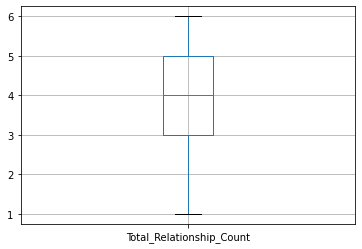

In [20]:
vector12 = df.loc[:,['Total_Relationship_Count']]
vector12.boxplot()

<AxesSubplot:>

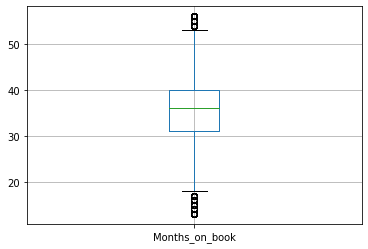

In [21]:
vector13 = df.loc[:,['Months_on_book']]
vector13.boxplot()

<AxesSubplot:>

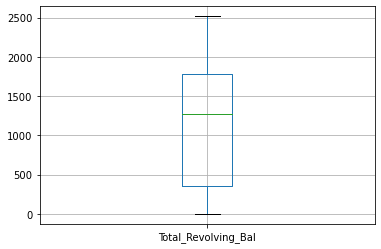

In [22]:
vector13 = df.loc[:,['Total_Revolving_Bal']]
vector13.boxplot()

<AxesSubplot:>

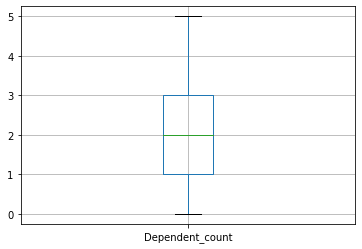

In [23]:
vector18 = df.loc[:,['Dependent_count']]
vector18.boxplot()

<AxesSubplot:>

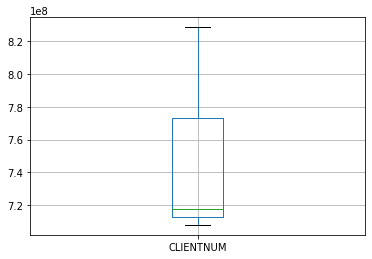

In [24]:
vector22 = df.loc[:,['CLIENTNUM']]
vector22.boxplot()

In [27]:

def upper(r):
    q1 =  np.quantile(r, 0.25)
    q3 =  np.quantile(r, 0.75)
    iqr = q3-q1
    upper_bound = q3 + (1.5*iqr)
    return upper_bound
def lower(r):
    q1 =  np.quantile(r, 0.25)
    q3 =  np.quantile(r, 0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    return lower_bound
    

   

In [37]:
atipico1 = df.loc[(df['classifier2']<lower(vector1)) | (df['classifier2']>upper(vector1)), ['classifier']]

promedio1 = atipico1.shape[0]/df.shape[0]
promedio1

0.16668312432112176

In [34]:
upper(vector)

0.0006947755000000001

In [35]:
upper(vector1)

1.00026

In [36]:

atipico = df.loc[(df['classifier']<lower(vector)) | (df['classifier']>upper(vector)), ['classifier']]

promedio = atipico.shape[0]/df.shape[0]
promedio

0.1669793621013133

In [42]:
valoresAtipicos(vector3)
atipico = df.loc[(df['Total_Ct_Chng_Q4_Q1']<lower(vector3)) | (df['Total_Ct_Chng_Q4_Q1']>upper(vector3)), ['Total_Ct_Chng_Q4_Q1']]

promedio = atipico.shape[0]/df.shape[0]
promedio

0.03890589513182581

In [43]:
valoresAtipicos(vector5)
atipico = df.loc[(df['Total_Trans_Amt']<lower(vector5)) | (df['Total_Trans_Amt']>upper(vector5)), ['Total_Trans_Amt']]

promedio = atipico.shape[0]/df.shape[0]
promedio

0.08847635035054804

In [44]:
valoresAtipicos(vector6)
atipico = df.loc[(df['Total_Amt_Chng_Q4_Q1']<lower(vector6)) | (df['Total_Amt_Chng_Q4_Q1']>upper(vector6)), ['Total_Amt_Chng_Q4_Q1']]

promedio = atipico.shape[0]/df.shape[0]
promedio

0.039103386985286856

In [411]:

valoresAtipicos(vector7)
atipico = df.loc[(df['Avg_Open_To_Buy']<lower(vector7)) | (df['Avg_Open_To_Buy']>upper_bound), ['Avg_Open_To_Buy']]

promedio = atipico.shape[0]/df.shape[0]
promedio

1.0

In [45]:
 
valoresAtipicos(vector9)
atipico = df.loc[(df['Credit_Limit']<lower(vector9)) | (df['Credit_Limit']>upper(vector9)), ['Credit_Limit']]

promedio = atipico.shape[0]/df.shape[0]
promedio

0.09716599190283401

0.0